In [1]:
import sympy as sym
import sympy.physics.mechanics as me
from sympy.abc import t
import moyra as ma
me.mechanics_printing()

In [2]:
DoFs = 3

# heave and fold angle as degrres of freedom
p = ma.DynamicModelParameters(DoFs)
p.DoFs  = ma.ModelSymbol(value = DoFs,string = 'DoFs')
#gravity vector
p.g  = ma.ModelSymbol(value = 9.81,string = 'g')                     # gravity
# p.g_v = ma.ModelMatrix(value =[0,0,-1],length=3,string='g_v') # The stationary point


p.M  = ma.ModelSymbol(value = 1,string = 'M')                     # gravity
p.m  = ma.ModelSymbol(value = 1,string = 'm')                     # gravity

p.K  = ma.ModelSymbol(value = 1,string = 'K')                     # gravity
p.k  = ma.ModelSymbol(value = 1,string = 'k')                     # gravity
p.k_theta  = ma.ModelSymbol(value = 1,string = 'k_theta')                     # gravity

p.C  = ma.ModelSymbol(value = 1,string = 'C')                     # gravity
p.c  = ma.ModelSymbol(value = 1,string = 'c')                     # gravity
p.c_theta  = ma.ModelSymbol(value = 1,string = 'c_theta')                     # gravity
p.L = ma.ModelSymbol(value = 1,string = 'L') 

In [3]:
base_frame = ma.frames.HomogenousFrame()
M_frame = base_frame.Translate(0,0,p.q[0])
p_frame = M_frame.R_x(p.q[1])
tip_frame = p_frame.Translate(0,0,-(p.L+p.q[2]))

centre_mass = ma.elements.RigidElement.point_mass(p.q,M_frame,p.M,grav_vec = sym.Matrix([0,0,-p.g]))
tip_mass = ma.elements.RigidElement.point_mass(p.q,tip_frame,p.m,grav_vec = sym.Matrix([0,0,-p.g]))

base_spring = ma.elements.Spring(p.q,p.q[0],p.K,name="base_spring")
rot_spring = ma.elements.Spring(p.q,p.q[1],p.k_theta,name="rot_spring")
pen_spring = ma.elements.Spring(p.q,p.q[2],p.k,name="pen_spring")

base_damper = ma.elements.Damper(p.q,p.qd[0],p.C,name="base_damper")
rot_damper = ma.elements.Damper(p.q,p.qd[1],p.c_theta,name="rot_damper")
pen_damper = ma.elements.Damper(p.q,p.qd[2],p.c,name="pen_damper")


In [4]:
tip_mass.ke

 2     2                                        2   2                         
L ⋅m⋅q₁̇             2                       m⋅q₂ ⋅q₁̇                        
──────── + L⋅m⋅q₂⋅q₁̇  + L⋅m⋅sin(q₁)⋅q₀̇⋅q₁̇ + ───────── + m⋅q₂⋅sin(q₁)⋅q₀̇⋅q₁
   2                                            2                             

                     2       2
                   m⋅q₀̇    m⋅q₂̇ 
̇ - m⋅cos(q₁)⋅q₀̇⋅q₂̇ + ───── + ─────
                   2       2  

In [5]:
# %%timeit -n 1 -r 1
sm = ma.SymbolicModel.FromElementsAndForces(p.q,[centre_mass,tip_mass,base_spring,rot_spring,pen_spring,base_damper,rot_damper,pen_damper])

Generating EoM for Element 1 out of 8 - default:RigidElement
Generating EoM for Element 2 out of 8 - default:RigidElement
Generating EoM for Element 3 out of 8 - base_spring:Spring
Generating EoM for Element 4 out of 8 - rot_spring:Spring
Generating EoM for Element 5 out of 8 - pen_spring:Spring
Generating EoM for Element 6 out of 8 - base_damper:Damper
Generating EoM for Element 7 out of 8 - rot_damper:Damper
Generating EoM for Element 8 out of 8 - pen_damper:Damper


In [6]:
sm.M

⎡      M + m           m⋅(L + q₂)⋅sin(q₁)     -m⋅cos(q₁)⎤
⎢                                                       ⎥
⎢                     2                    2            ⎥
⎢m⋅(L + q₂)⋅sin(q₁)  L ⋅m + 2⋅L⋅m⋅q₂ + m⋅q₂       0     ⎥
⎢                                                       ⎥
⎣    -m⋅cos(q₁)                 0                 m     ⎦

In [7]:
sm.f

⎡                                              C⋅q₀̇ + K⋅q₀ + M⋅g + g⋅m + m⋅si
⎢                                                                             
⎢-L⋅m⋅cos(q₁)⋅q₀̇⋅q₁̇ + cₜₕₑₜₐ⋅q₁̇ - g⋅m⋅(-L - q₂)⋅sin(q₁) + kₜₕₑₜₐ⋅q₁ - m⋅q₂⋅
⎢                                                                             
⎢                                                                        2    
⎣                                                                - L⋅m⋅q₁̇  + 

n(q₁)⋅q₁̇⋅q₂̇ + (m⋅(L + q₂)⋅cos(q₁)⋅q₁̇ + m⋅sin(q₁)⋅q₂̇)⋅q₁̇                  
                                                                              
cos(q₁)⋅q₀̇⋅q₁̇ - m⋅sin(q₁)⋅q₀̇⋅q₂̇ + (2⋅L⋅m⋅q₂̇ + 2⋅m⋅q₂⋅q₂̇)⋅q₁̇ + (m⋅(L + q
                                                                              
                                  2                                           
c⋅q₂̇ - g⋅m⋅cos(q₁) + k⋅q₂ - m⋅q₂⋅q₁̇                                         

                            ⎤
                    

In [26]:
p.z = me.dynamicsymbols('z') 
p.theta = me.dynamicsymbols('theta') 
p.R = me.dynamicsymbols('R') 

sm_sub = sm.msubs({p.qd[0]:p.z.diff(t),p.qd[1]:p.theta.diff(t),p.qd[2]:p.R.diff(t),p.q[0]:p.z,p.q[1]:p.theta,p.q[2]:p.R})

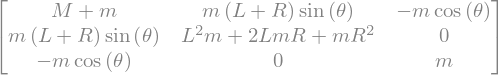

In [27]:
sm_sub.M

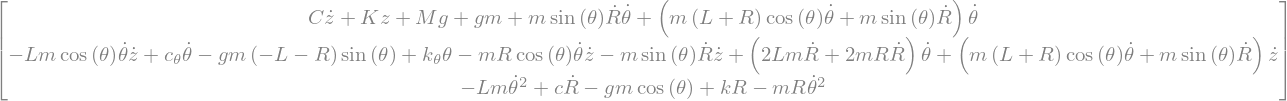

In [28]:
sm_sub.f

In [32]:
base_dir = "C:\\Users\\qe19391\\OneDrive - University of Bristol\\Documents\\MATLAB\\ForLC_pen"
class_name = "pen_model"
base_class = "BaseRC"
sm.to_matlab_class(p,base_dir,class_name,base_class,additional_funcs=[])